# MNIST with Neural Networks

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

2024-12-12 15:34:22.677082: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
from sklearn.model_selection import train_test_split

# separate X_train_full into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=25)

In [9]:
# check the shapes for X_train, X_validation, X_test

print(f"X_train: {X_train.shape} \n X_validation: {X_validation.shape} \n X_test: {X_test.shape}")
print(f"y_train: {y_train.shape} \n y_validation: {y_validation} \n y_test: {y_test.shape}")

X_train: (48000, 28, 28) 
 X_validation: (12000, 28, 28) 
 X_test: (10000, 28, 28)
y_train: (48000,) 
 y_validation: [9 7 8 ... 3 7 4] 
 y_test: (10000,)


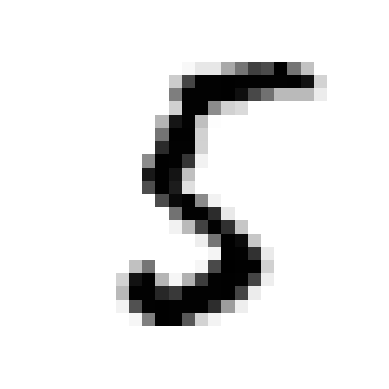

In [12]:
# plot a few digits
import matplotlib.pyplot as plt

plt.imshow(X_train[45], cmap="binary")
plt.axis('off')
plt.show()

In [17]:
# Create a normalisation layer
normalisation_layer = tf.keras.layers.Normalization(axis=-1)
normalisation_layer.adapt(X_train)  # Compute the mean and variance from the training data



model = tf.keras.models.Sequential([
    normalisation_layer,
    tf.keras.layers.Flatten(input_shape=[28,28]), # receives input data and converts it to 1d array
    tf.keras.layers.Dense(300, activation="relu"), # dense layer with 300 neurons
    tf.keras.layers.Dense(100, activation="relu"), # second dense layer with 100 neurons
    tf.keras.layers.Dense(10, activation="softmax") #output layer, with 10 nodes, as 10 classes, softmax because multiclass
])



#compile the model
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])


history = model.fit(X_train,y_train, validation_data=(X_validation, y_validation), epochs=30)

Epoch 1/30


/Users/gabi/codes/data_science/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8008 - loss: 0.6943 - val_accuracy: 0.9323 - val_loss: 0.2528
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9398 - loss: 0.2064 - val_accuracy: 0.9472 - val_loss: 0.2053
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9567 - loss: 0.1495 - val_accuracy: 0.9532 - val_loss: 0.1772
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9668 - loss: 0.1168 - val_accuracy: 0.9559 - val_loss: 0.1659
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9719 - loss: 0.0965 - val_accuracy: 0.9604 - val_loss: 0.1532
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9775 - loss: 0.0798 - val_accuracy: 0.9623 - val_loss: 0.1480
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9808 - loss: 0.0715 - val_accuracy: 0.9640 - val_loss: 0.1452
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9840 - loss: 0.0602 - val_accurac

In [19]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1423


[0.12930111587047577, 0.9717000126838684]